<a href="https://colab.research.google.com/github/SanghunOh/with_data_analytics/blob/main/codes/%EC%A7%80%EC%A0%90%EB%B3%84_%EC%97%B0_%EA%B8%B0%EC%98%A8%EB%B3%80%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Connect google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path_root = '/content/drive/MyDrive/datas/'

# 작업 경로 설정
import os
os.chdir(path_root)
!pwd

/content/drive/.shortcut-targets-by-id/1tHYgEz3lQF-LmtFPXRgMBDh4UN54qeAs/datas


In [3]:
import glob

filename_list = []
for file_name in glob.glob("./kma_ASOS_*.csv"):
    filename_list.append(file_name)
filename_list

['./kma_ASOS_1945_1954.csv', './kma_ASOS_1955_1964.csv']

##read csv from files and concat DataFrammes

In [4]:
import pandas as pd

In [5]:
df_csv_list = list()
for file_name in filename_list:
  df_csv_list.append(pd.read_csv(file_name, encoding='cp949'))

df_concat = pd.concat(df_csv_list)
# df_concat

In [6]:
# show all rows
# pd.options.display.max_rows = df_concat.shape[0]
df_concat

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,105,강릉,1945-01-01,-3.2,-6.8,NaN,0.7,NaN
1,105,강릉,1945-01-02,-3.6,-8.4,NaN,0.5,NaN
2,105,강릉,1945-01-03,0.9,-4.0,NaN,5.0,NaN
3,105,강릉,1945-01-04,1.1,-3.2,NaN,4.9,NaN
4,105,강릉,1945-01-05,-5.7,-9.1,NaN,-1.4,NaN
...,...,...,...,...,...,...,...,...
52963,189,서귀포,1964-12-27,9.3,4.4,2307.0,14.1,1227.0
52964,189,서귀포,1964-12-28,8.6,3.2,323.0,13.2,1238.0
52965,189,서귀포,1964-12-29,8.4,3.6,602.0,15.1,1318.0
52966,189,서귀포,1964-12-30,10.1,3.8,2348.0,14.5,1328.0


In [7]:
df_concat.loc[0]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,105,강릉,1945-01-01,-3.2,-6.8,NaN,0.7,NaN
0,105,강릉,1955-01-01,0.0,-4.7,NaN,5.6,NaN


###데이터타입으로 변경 : 일시 object

In [8]:
df_concat.columns, df_concat.dtypes

(Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
        '최고기온 시각(hhmi)'],
       dtype='object'), 지점                 int64
 지점명               object
 일시                object
 평균기온(°C)         float64
 최저기온(°C)         float64
 최저기온 시각(hhmi)    float64
 최고기온(°C)         float64
 최고기온 시각(hhmi)    float64
 dtype: object)

In [9]:
df_concat['일시'] = pd.to_datetime(df_concat['일시'])
df_concat.dtypes

지점                        int64
지점명                      object
일시               datetime64[ns]
평균기온(°C)                float64
최저기온(°C)                float64
최저기온 시각(hhmi)           float64
최고기온(°C)                float64
최고기온 시각(hhmi)           float64
dtype: object

##EDA

In [10]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97719 entries, 0 to 52967
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점             97719 non-null  int64         
 1   지점명            97719 non-null  object        
 2   일시             97719 non-null  datetime64[ns]
 3   평균기온(°C)       97715 non-null  float64       
 4   최저기온(°C)       97652 non-null  float64       
 5   최저기온 시각(hhmi)  63242 non-null  float64       
 6   최고기온(°C)       97673 non-null  float64       
 7   최고기온 시각(hhmi)  63264 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 8.7+ MB


In [11]:
df_concat['지점명'].unique(), #df_concat['지점명'].nunique(), 

(array(['강릉', '서울', '인천', '울릉도', '추풍령', '포항', '대구', '전주', '울산', '광주', '부산',
        '목포', '여수', '제주', '수원', '서귀포'], dtype=object),)

In [12]:
df_concat['일시'].dt.year.unique()

array([1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964])

In [13]:
df_concat['일시'].dt.year.value_counts().sort_index()

1945    4019
1946    4380
1947    4380
1948    4387
1949    5110
1950    4212
1951    3864
1952    4513
1953    4776
1954    5110
1955    5110
1956    5124
1957    5110
1958    5110
1959    5110
1960    5124
1961    5474
1962    5475
1963    5475
1964    5856
Name: 일시, dtype: int64

In [14]:
df_concat['지점명'].value_counts().sort_values()

수원      366
서귀포    1460
추풍령    5020
포항     5691
서울     6118
인천     6818
울산     6944
강릉     6990
여수     7177
울릉도    7305
대구     7305
전주     7305
광주     7305
부산     7305
목포     7305
제주     7305
Name: 지점명, dtype: int64

In [15]:
df_concat['year'] = df_concat['일시'].dt.year
df_concat

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),year
0,105,강릉,1945-01-01,-3.2,-6.8,NaN,0.7,NaN,1945
1,105,강릉,1945-01-02,-3.6,-8.4,NaN,0.5,NaN,1945
2,105,강릉,1945-01-03,0.9,-4.0,NaN,5.0,NaN,1945
3,105,강릉,1945-01-04,1.1,-3.2,NaN,4.9,NaN,1945
4,105,강릉,1945-01-05,-5.7,-9.1,NaN,-1.4,NaN,1945
...,...,...,...,...,...,...,...,...,...
52963,189,서귀포,1964-12-27,9.3,4.4,2307.0,14.1,1227.0,1964
52964,189,서귀포,1964-12-28,8.6,3.2,323.0,13.2,1238.0,1964
52965,189,서귀포,1964-12-29,8.4,3.6,602.0,15.1,1318.0,1964
52966,189,서귀포,1964-12-30,10.1,3.8,2348.0,14.5,1328.0,1964


##기온 데이터 분석

In [16]:
df_concat['year'].unique()

array([1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964])

In [17]:
all_year_1962 = df_concat[df_concat['year']==1962].copy()
all_year_1962

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),year
2557,105,강릉,1962-01-01,0.5,-2.7,NaN,3.1,NaN,1962
2558,105,강릉,1962-01-02,-0.4,-3.9,NaN,3.8,NaN,1962
2559,105,강릉,1962-01-03,0.0,-4.6,NaN,4.4,NaN,1962
2560,105,강릉,1962-01-04,2.1,-4.7,NaN,5.5,NaN,1962
2561,105,강릉,1962-01-05,-4.1,-7.8,NaN,0.8,NaN,1962
...,...,...,...,...,...,...,...,...,...
52232,189,서귀포,1962-12-27,13.7,12.2,933.0,14.8,1416.0,1962
52233,189,서귀포,1962-12-28,13.1,12.0,208.0,15.3,1448.0,1962
52234,189,서귀포,1962-12-29,13.6,10.8,307.0,17.0,1253.0,1962
52235,189,서귀포,1962-12-30,3.8,1.7,748.0,13.3,14.0,1962


In [18]:
all_year_1962['지점명'].value_counts()

강릉     365
서울     365
인천     365
울릉도    365
추풍령    365
포항     365
대구     365
전주     365
울산     365
광주     365
부산     365
목포     365
여수     365
제주     365
서귀포    365
Name: 지점명, dtype: int64

###결측치 확인

In [19]:
all_year_1962.isnull().sum()

지점                 0
지점명                0
일시                 0
평균기온(°C)           0
최저기온(°C)           0
최저기온 시각(hhmi)    380
최고기온(°C)           0
최고기온 시각(hhmi)    380
year               0
dtype: int64

In [20]:
codition = all_year_1962['최저기온 시각(hhmi)'].isnull() | all_year_1962['최고기온 시각(hhmi)'].isnull()
all_year_1962[codition] #.count()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),year
2557,105,강릉,1962-01-01,0.5,-2.7,NaN,3.1,NaN,1962
2558,105,강릉,1962-01-02,-0.4,-3.9,NaN,3.8,NaN,1962
2559,105,강릉,1962-01-03,0.0,-4.6,NaN,4.4,NaN,1962
2560,105,강릉,1962-01-04,2.1,-4.7,NaN,5.5,NaN,1962
2561,105,강릉,1962-01-05,-4.1,-7.8,NaN,0.8,NaN,1962
...,...,...,...,...,...,...,...,...,...
51998,189,서귀포,1962-05-07,15.7,12.4,NaN,20.2,NaN,1962
52082,189,서귀포,1962-07-30,28.3,26.8,NaN,30.9,NaN,1962
52087,189,서귀포,1962-08-04,25.2,23.8,NaN,27.6,NaN,1962
52090,189,서귀포,1962-08-07,26.1,25.0,NaN,28.0,NaN,1962


In [21]:
all_year_1962[codition].value_counts('지점명')

지점명
강릉     95
광주     90
목포     90
전주     90
서귀포     7
울릉도     4
추풍령     3
인천      1
dtype: int64

In [22]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [23]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

### 지점별 최저, 최고, 평균 시각화

In [24]:
all_year_mean = all_year_1962.groupby('지점명')['평균기온(°C)'].mean().sort_values(ascending=False)
all_year_mean

지점명
제주     15.169041
서귀포    15.006301
부산     14.061370
여수     13.790137
목포     13.771781
포항     13.467123
울산     13.362192
대구     13.214521
광주     13.016438
전주     12.867123
강릉     12.729041
울릉도    12.091233
추풍령    11.837260
서울     11.756986
인천     11.467945
Name: 평균기온(°C), dtype: float64

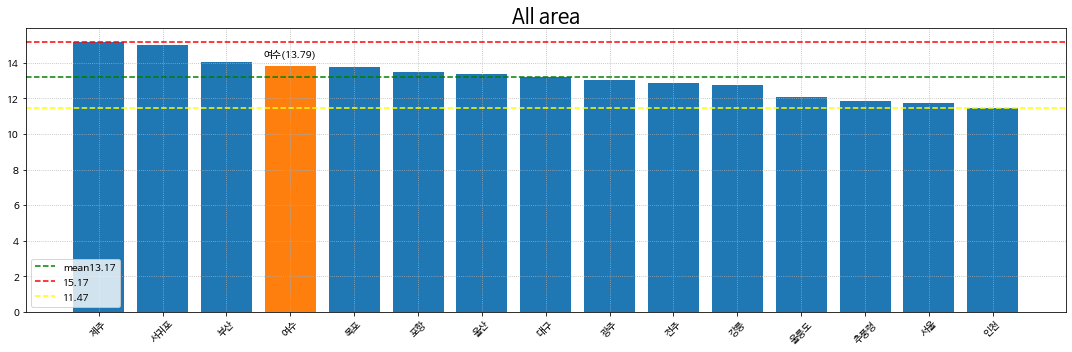

In [25]:
plt.figure(figsize=(15,5))
plt.bar(all_year_mean.index, all_year_mean.values)
plt.xticks(rotation=45)

mean = all_year_mean.mean()
plt.axhline(mean, ls='--', color='green',  label='{0}{1:.2f}'.format('mean',mean))
max = all_year_mean.max()
plt.axhline(max, ls='--', color='red',  label='{0:.2f}'.format(max))
min = all_year_mean.min()
plt.axhline(min, ls='--', color='yellow',  label='{0:.2f}'.format(min))
plt.legend()

plt.bar('여수', all_year_mean.loc['여수'])
text = '{0}({1:.2f})'.format('여수', all_year_mean.loc['여수'])
plt.text('여수', all_year_mean.loc['여수']+0.5, text, ha='center')

plt.grid(ls=':')
plt.title('All area', size=20)
plt.tight_layout()
plt.show()

###지점별 기온분포 시각화 - 히스토그램

In [26]:
all_year_min = all_year_1962.groupby('지점명')['평균기온(°C)'].min().sort_values(ascending=False)
all_year_max = all_year_1962.groupby('지점명')['평균기온(°C)'].max().sort_values(ascending=False)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


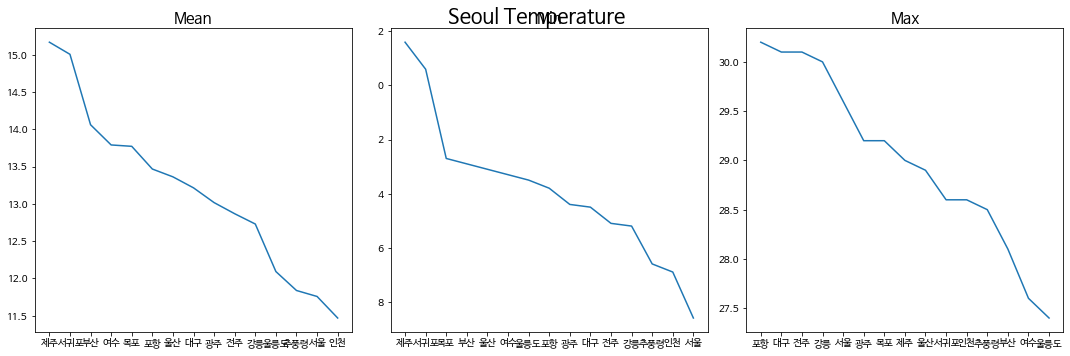

In [27]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(all_year_mean)
plt.title('Mean', size=15)

plt.subplot(1,3,2)
plt.plot(all_year_min)
plt.title('Min', size=15)

plt.subplot(1,3,3)
plt.plot(all_year_max)
plt.title('Max', size=15)

fig.suptitle('Seoul Temperature', size=20)
fig.tight_layout()
plt.show()

In [28]:
all_year_temperatures = [all_year_mean, all_year_min, all_year_max]

In [29]:
len(all_year_temperatures)

3

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


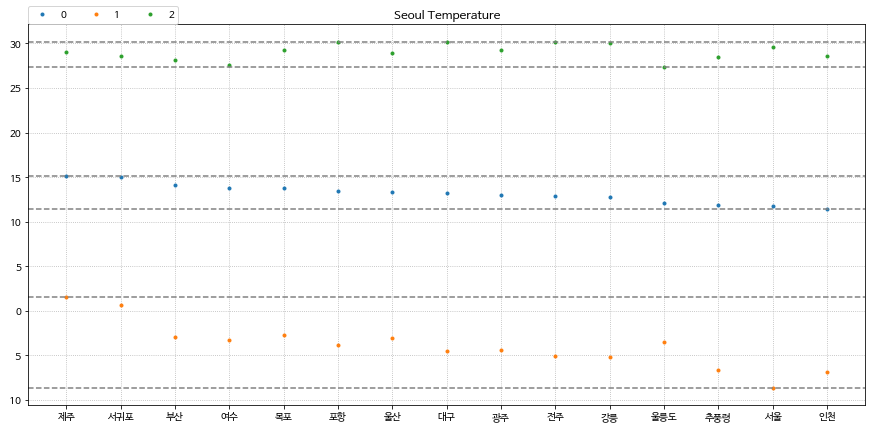

In [30]:
plt.figure(figsize=(15,7))
for index, temperature in enumerate(all_year_temperatures) :
  plt.plot(temperature, '.', label='{}'.format(index))
  plt.axhline(temperature.min(), color='gray', ls='--')
  plt.axhline(temperature.max(), color='gray', ls='--')
  
plt.grid(ls=':')
plt.legend(loc=(0,1.0), ncol=3)
plt.title('Seoul Temperature')

plt.show()

##특정 지점별 일 평균 기온 히스토그램

In [32]:
all_year_1962.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', 'year'],
      dtype='object')

In [33]:
all_year_1962['지점명'].unique()

array(['강릉', '서울', '인천', '울릉도', '추풍령', '포항', '대구', '전주', '울산', '광주', '부산',
       '목포', '여수', '제주', '서귀포'], dtype=object)

In [35]:
jeju_1962 = all_year_1962[all_year_1962['지점명']=='제주'].copy()
# jeju_1962
deagu_1962 = all_year_1962[all_year_1962['지점명']=='대구'].copy()
incheon_1962 = all_year_1962[all_year_1962['지점명']=='인천'].copy()

###히스토그램

In [45]:
# plt.rcParams

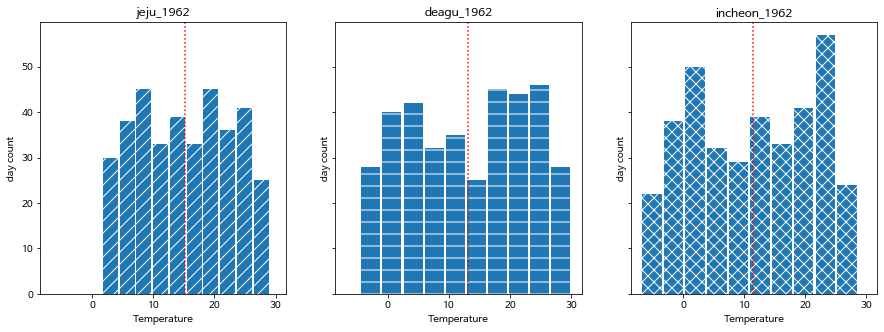

In [60]:
plt.rcParams['hatch.color'] = 'w'
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

ax[0].hist(jeju_1962['평균기온(°C)'], rwidth=0.9, hatch='//', )
ax[0].set_title('jeju_1962')
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('day count')
mean = jeju_1962['평균기온(°C)'].mean()
ax[0].axvline(mean, color='red', ls=':')
# ax[0].text()

ax[1].hist(deagu_1962['평균기온(°C)'], rwidth=0.9, hatch='-', )
ax[1].set_title('deagu_1962')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('day count')
mean = deagu_1962['평균기온(°C)'].mean()
ax[1].axvline(mean, color='red', ls=':')

ax[2].hist(incheon_1962['평균기온(°C)'], rwidth=0.9, hatch='XX', )
ax[2].set_title('incheon_1962')
ax[2].set_xlabel('Temperature')
ax[2].set_ylabel('day count')
mean = incheon_1962['평균기온(°C)'].mean()
ax[2].axvline(mean, color='red', ls=':')

plt.show()